In [72]:
import pickle
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Activation
pd.set_option('display.max_columns', 500)


In [73]:
dataset= pickle.load(open('ts_with_weather.p', 'rb'))

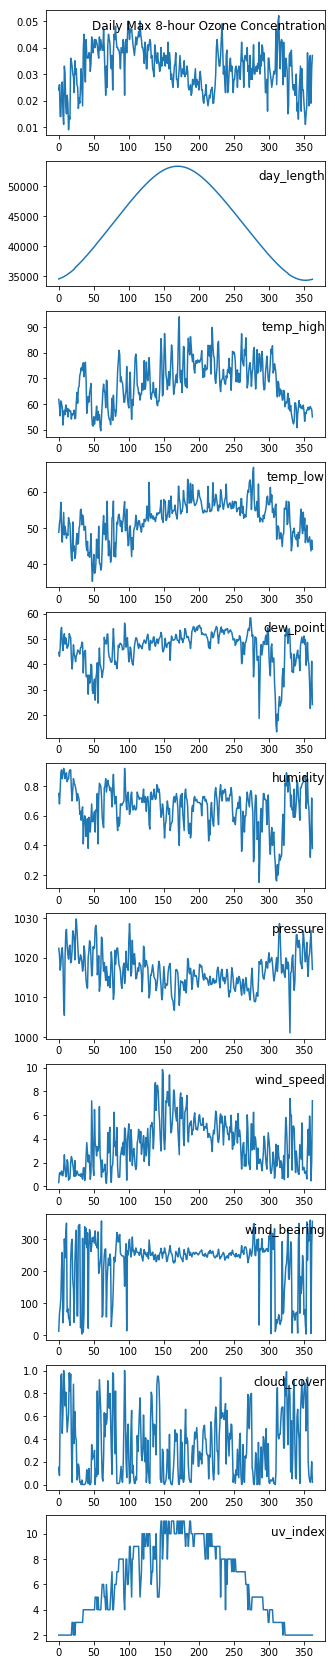

In [74]:
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,4, 5, 6, 7, 8, 9, 10]
i = 1

# plot each column
plt.figure(figsize=(5,30))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.8, loc='right')
    i += 1
plt.show()

In [75]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 


In [89]:
# load dataset
values = dataset.values
# integer encode direction
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 18, 1)
# drop columns we don't want to predict

reframed.head()

,var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var7(t-18),var8(t-18),var9(t-18),var10(t-18),var11(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var7(t-17),var8(t-17),var9(t-17),var10(t-17),var11(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var7(t-16),var8(t-16),var9(t-16),var10(t-16),var11(t-16),var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var7(t-15),var8(t-15),var9(t-15),var10(t-15),var11(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),var5(t-14),var6(t-14),var7(t-14),var8(t-14),var9(t-14),var10(t-14),var11(t-14),var1(t-13),var2(t-13),var3(t-13),var4(t-13),var5(t-13),var6(t-13),var7(t-13),var8(t-13),var9(t-13),var10(t-13),var11(t-13),var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var8(t-12),var9(t-12),var10(t-12),var11(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),var6(t-11),var7(t-11),var8(t-11),var9(t-11),var10(t-11),var11(t-11),var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var7(t-10),var8(t-10),var9(t-10),var10(t-10),var11(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),var5(t-9),var6(t-9),var7(t-9),var8(t-9),var9(t-9),var10(t-9),var11(t-9),var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var6(t-8),var7(t-8),var8(t-8),var9(t-8),var10(t-8),var11(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var8(t-7),var9(t-7),var10(t-7),var11(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),var11(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),var11(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t)
18,0.348837,0.011802,0.275885,0.429799,0.697064,0.779221,0.742184,0.008316,0.025352,0.15,0.0,0.395349,0.013962,0.219490,0.505890,0.662811,0.688312,0.687634,0.089397,0.177465,0.08,0.0,0.116279,0.016386,0.131514,0.552053,0.732874,0.805195,0.550732,0.095634,0.230986,0.59,0.0,0.116279,0.018967,0.262125,0.692773,0.881228,0.961039,0.598335,0.076923,0.312676,0.95,0.0,0.395349,0.021654,0.240244,0.445400,0.916370,0.987013,0.719250,0.109148,0.583099,0.97,0.0,0.418605,0.024552,0.206406,0.344158,0.771797,0.909091,0.747047,0.069647,0.715493,0.45,0.0,0.139535,0.027608,0.050981,0.474053,0.713301,0.948052,0.644199,0.068607,0.098592,0.64,0.0,0.046512,0.030874,0.138507,0.604584,0.820507,1.000000,0.270676,0.125780,0.236620,1.00,0.0,0.558140,0.034247,0.180013,0.407195,0.860543,0.974026,0.154274,0.251559,0.833803,0.90,0.0,0.488372,0.037777,0.140988,0.482012,0.769128,0.909091,0.663658,0.142412,0.667606,0.69,0.0,0.209302,0.041517,0.226934,0.435530,0.824288,0.948052,0.873177,0.058212,0.861972,0.81,0.0,0.139535,0.045416,0.172344,0.378223,0.785365,0.961039,0.908619,0.073805,0.971831,0.65,0.0,0.302326,0.049420,0.197158,0.418656,0.733541,0.883117,0.763378,0.207900,0.194366,0.46,0.0,0.232558,0.053583,0.121588,0.403375,0.747776,0.909091,0.687286,0.183992,0.222535,0.54,0.0,0.000000,0.057903,0.191293,0.559376,0.770463,0.909091,0.647327,0.029106,0.140845,0.62,0.0,0.116279,0.062381,0.169637,0.517670,0.861210,0.974026,0.756779,0.037422,0.123944,0.98,0.000000,0.093023,0.066965,0.169862,0.508437,0.838745,0.987013,0.769981,0.046778,0.076056,0.82,0.000000,0.627907,0.071707,0.174825,0.322827,0.828069,0.987013,0.615013,0.177755,0.639437,0.97,0.000000,0.604651,0.076554,0.102865,0.202483,0.651468,0.818182,0.630299,0.235967,0.794366,0.38,0.000000
19,0.395349,0.013962,0.219490,0.505890,0.662811,0.688312,0.68

In [90]:
y = reframed.iloc[:,-11].values
X = reframed.drop('var1(t)', axis =1).values
# split into train and test sets

n_train_days = 200
train_X = X[:n_train_days,:]
train_y = y[:n_train_days]

test_X= X[n_train_days:,]
test_y= y[n_train_days:]



# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 1, 208) (200,) (145, 1, 208) (145,)


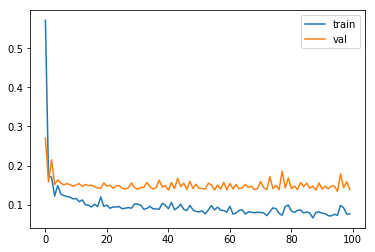

In [106]:

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1, recurrent_dropout=0.1))

# model.add(Activation("relu"))
model.add(Dense(200))
model.add(Activation("tanh"))
# model.add(Dense(200))
# model.add(Dropout(.2))
model.add(Dense(200))
model.add(Dropout(.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=50, validation_data=(test_X, test_y), verbose=0, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

Train on 200 samples, validate on 145 samples
Epoch 1/100
 - 5s - loss: 0.4072 - val_loss: 0.1759
Epoch 2/100
 - 0s - loss: 0.2625 - val_loss: 0.2523
Epoch 3/100
 - 0s - loss: 0.2653 - val_loss: 0.1781
Epoch 4/100
 - 0s - loss: 0.1411 - val_loss: 0.2126
Epoch 5/100
 - 0s - loss: 0.1911 - val_loss: 0.2436
Epoch 6/100
 - 0s - loss: 0.1805 - val_loss: 0.1799
Epoch 7/100
 - 0s - loss: 0.1508 - val_loss: 0.1645
Epoch 8/100
 - 0s - loss: 0.1545 - val_loss: 0.1656
Epoch 9/100
 - 0s - loss: 0.1401 - val_loss: 0.1635
Epoch 10/100
 - 0s - loss: 0.1300 - val_loss: 0.1735
Epoch 11/100
 - 0s - loss: 0.1386 - val_loss: 0.1708
Epoch 12/100
 - 0s - loss: 0.1318 - val_loss: 0.1628
Epoch 13/100
 - 0s - loss: 0.1283 - val_loss: 0.1616
Epoch 14/100
 - 0s - loss: 0.1284 - val_loss: 0.1613
Epoch 15/100
 - 0s - loss: 0.1252 - val_loss: 0.1630
Epoch 16/100
 - 0s - loss: 0.1243 - val_loss: 0.1657
Epoch 17/100
 - 0s - loss: 0.1235 - val_loss: 0.1617
Epoch 18/100
 - 0s - loss: 0.1212 - val_loss: 0.1592
Epoch 19/

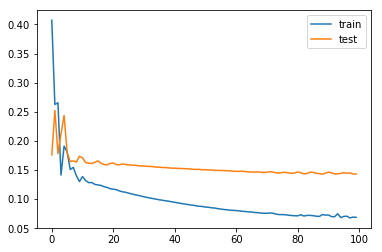

In [92]:
simple_rnn = Sequential()
simple_rnn.add(SimpleRNN(14, input_shape=(train_X.shape[1], train_X.shape[2])))
simple_rnn.add(Dense(1))
simple_rnn.compile(loss='mae', optimizer='adam')
               
history = simple_rnn.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(150, input_shape=(1, 208), dropout=0.2, recurrent_dropout=0.2)`
  """


Train on 200 samples, validate on 145 samples
Epoch 1/100
 - 6s - loss: 0.2499 - val_loss: 0.1657
Epoch 2/100
 - 0s - loss: 0.2652 - val_loss: 0.1510
Epoch 3/100
 - 0s - loss: 0.2551 - val_loss: 0.1678
Epoch 4/100
 - 0s - loss: 0.1671 - val_loss: 0.1582
Epoch 5/100
 - 0s - loss: 0.2067 - val_loss: 0.1592
Epoch 6/100
 - 0s - loss: 0.1383 - val_loss: 0.1628
Epoch 7/100
 - 0s - loss: 0.1563 - val_loss: 0.1545
Epoch 8/100
 - 0s - loss: 0.1339 - val_loss: 0.1509
Epoch 9/100
 - 0s - loss: 0.1633 - val_loss: 0.1709
Epoch 10/100
 - 0s - loss: 0.1271 - val_loss: 0.1417
Epoch 11/100
 - 0s - loss: 0.1317 - val_loss: 0.1462
Epoch 12/100
 - 0s - loss: 0.1577 - val_loss: 0.2058
Epoch 13/100
 - 0s - loss: 0.1528 - val_loss: 0.1480
Epoch 14/100
 - 0s - loss: 0.1420 - val_loss: 0.1435
Epoch 15/100
 - 0s - loss: 0.1300 - val_loss: 0.1423
Epoch 16/100
 - 0s - loss: 0.1171 - val_loss: 0.1556
Epoch 17/100
 - 0s - loss: 0.1329 - val_loss: 0.1614
Epoch 18/100
 - 0s - loss: 0.1249 - val_loss: 0.1397
Epoch 19/

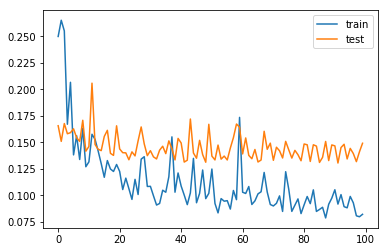

In [93]:
##GRU stacked LSTM

# design network
model = Sequential()
model.add(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]), dropout_W=0.2, dropout_U=0.2))
model.add(Dense(200))
model.add(Dropout(.3))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=20, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [81]:
model.predict(test_X)

array([[0.367675  ],
       [0.37527657],
       [0.3818889 ],
       [0.37696752],
       [0.38119036],
       [0.3637122 ],
       [0.3651737 ],
       [0.38270962],
       [0.38103592],
       [0.38808012],
       [0.3852757 ],
       [0.38295674],
       [0.4039007 ],
       [0.41167158],
       [0.42643484],
       [0.43924096],
       [0.44426438],
       [0.44822446],
       [0.46838367],
       [0.49834752],
       [0.52600825],
       [0.507172  ],
       [0.499424  ],
       [0.51329947],
       [0.5121429 ],
       [0.5126497 ],
       [0.5490543 ],
       [0.55693406],
       [0.51893014],
       [0.50533533],
       [0.50879097],
       [0.52906346],
       [0.5471057 ],
       [0.5488328 ],
       [0.5135517 ],
       [0.5001347 ],
       [0.49031013],
       [0.4916881 ],
       [0.51464105],
       [0.5227895 ],
       [0.540653  ],
       [0.52509916],
       [0.52754974],
       [0.5237937 ],
       [0.51611924],
       [0.5195752 ],
       [0.5014173 ],
       [0.513